## Importing Packages

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import resample


# Random Forest 
from sklearn.preprocessing import StandardScaler

#XGBoost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

## Reading in the Data

In [121]:
df = pd.read_csv('data/filtered_data.csv')

In [122]:
df

,Unnamed: 0,gameid,GameDate,ab,pitchnum,inning,teambat,balls,strikes,outs,...,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,strikeout_binary
0,8,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,32,4,4.0,1,1.0,2.0,1.0,...,5.260902,-0.114617,2.546066,115,Colorado Rockies,121,New York Mets,19,Coors Field,1
1,11,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,33,3,4.0,1,0.0,2.0,2.0,...,6.102530,0.880186,1.700091,115,Colorado Rockies,121,New York Mets,19,Coors Field,0
2,30,2021/04/21/pitmlb-detmlb-2,4/21/2021 17:40,45,4,6.0,1,1.0,2.0,0.0,...,-3.835304,-0.239593,2.348037,116,Detroit Tigers,134,Pittsburgh Pirates,2394,Comerica Park,0
3,33,2021/04/25/arimlb-atlmlb-1,4/25/2021 12:20,12,4,2.0,0,1.0,2.0,1.0,...,2.129060,1.028702,2.689594,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park,0
4,38,2021/04/25/arimlb-atlmlb-1,4/25/2021 12:20,12,3,2.0,0,0.0,2.0,1.0,...,13.794325,1.286732,2.807080,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187400,717544,2023/08/30/clemlb-minmlb-1,8/30/2023 17:10,42,5,6.0,1,1.0,2.0,0.0,...,-3.927244,-0.362439,1.593713,142,Minnesota Twins,114,Cleveland Guardians,3312,Target Field,0
187401,717550,2023/08/30/atlmlb-colmlb-1,8/31/2023 0:40,37,3,5.0,1,0.0,2.0,0.0,...,4.477882,0.436818,1.588252,115,Colorado Rockies,144,Atlanta Braves,19,Coors Field,0
187402,717573,2023/08/30/arimlb-lanmlb-1,8/31/2023 2:10,34,5,4.0,1,1.0,2.0,0.0,...,14.275191,0.586442,1.884596,119,Los Angeles Dodgers,109,Arizona Diamondbacks,22,Dodger Stadium,0
187403,717576,2023/09/02/pitmlb-slnmlb-1,9/2/2023 23:15,54,4,7.0,0,1.0,2.0,0.0,...,14.733393,-0.807034,4.470551,138,St. Louis Cardinals,134,Pittsburgh Pirates,2889,Busch Stadium,0


## Filtering the DataFrame

In [123]:
data = df[["pitcher","pitchname", "pitchresult", "eventtype","spinrate", "relspeed", "horzbreak", "inducedvertbreak", "platelocside", "platelocheight", "strikeout_binary"]].copy()

In [124]:
data = data[data['pitchname'] == 'FF'].copy()

In [125]:
data['eventtype'].unique()

array(['ball', 'foul', 'single', 'field_out', 'grounded_into_double_play',
       'strikeout', 'force_out', 'hit_by_pitch', 'home_run', 'sac_fly',
       'double_play', 'double', 'stolen_base_2b', 'triple', 'sac_bunt',
       'field_error', 'caught_stealing_2b', 'wild_pitch',
       'defensive_indiff', 'passed_ball', 'fielders_choice_out',
       'pickoff_caught_stealing_2b', 'stolen_base_3b', 'fielders_choice',
       'swinging_strike', 'caught_stealing_home', 'strikeout_double_play',
       'catcher_interf', 'stolen_base_home', 'pickoff_attempt_1b',
       'sac_fly_double_play', 'pickoff_attempt_3b', 'pickoff_3b',
       'caught_stealing_3b', 'pickoff_attempt_2b', 'pickoff_1b',
       'triple_play'], dtype=object)

In [126]:
data = data[~data['eventtype'].isin(['field_out'])]
data

,pitcher,pitchname,pitchresult,eventtype,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,strikeout_binary
4,"Wilson, Bryse",FF,B,ball,2143.301025,94.614914,3.280700,13.794325,1.286732,2.807080,0
10,"Houck, Tanner",FF,F,foul,2164.971191,96.171303,9.286347,7.589095,0.122586,2.129726,0
13,"Barnes, Jacob",FF,D,single,2254.785645,93.305214,-2.640007,12.777637,0.605103,2.710316,0
17,"Houck, Tanner",FF,X,grounded_into_double_play,2082.749023,94.901627,8.153946,6.207467,-0.378895,3.240144,0
23,"Yajure, Miguel",FF,B,ball,2465.145264,90.507637,5.920645,17.932449,-0.729870,4.935426,0
...,...,...,...,...,...,...,...,...,...,...,...
187398,"Alcantara, Sandy",FF,E,home_run,2341.313232,99.597092,13.290255,14.944304,-0.707683,3.001816,0
187399,"Karinchak, James",FF,S,strikeout,2320.230225,94.827782,5.813662,19.101568,-0.477500,4.648829,1
187402,"Pfaadt, Brandon",FF,D,single,2501.821533,94.116440,3.854095,14.275191,0.586442,1.884596,0
187403,"Gallegos, Giovanny",FF,B,ball,2398.320557,93.521347,10.798670,14.733393,-0.807034,4.470551,0


### Looking at outliers

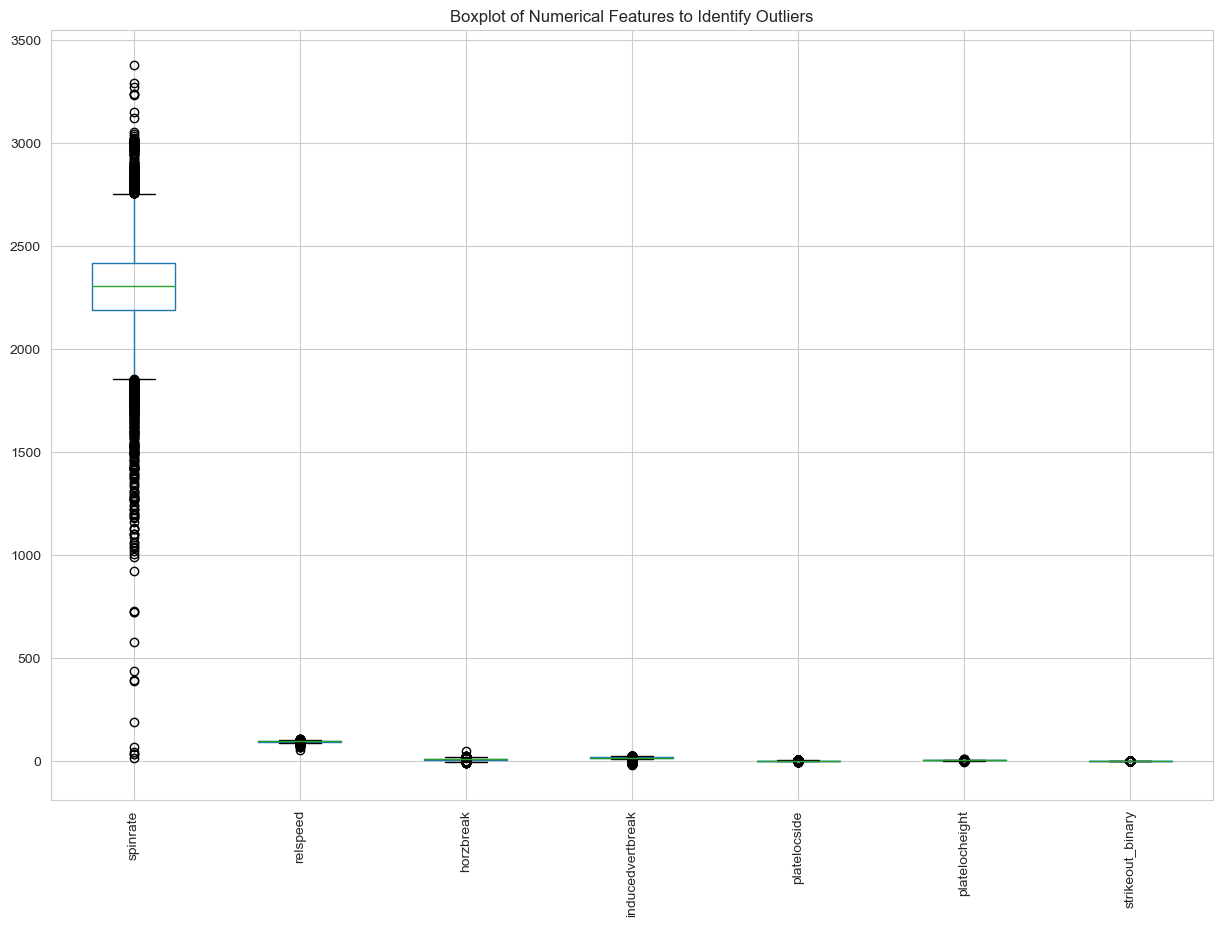

In [39]:
numerical_features = data.select_dtypes(include=[np.number]).columns
numerical_data = data[numerical_features]

# Plot boxplots for numerical features to visualize outliers
plt.figure(figsize=(15, 10))
numerical_data.boxplot(rot=90)
plt.title('Boxplot of Numerical Features to Identify Outliers')
plt.show()

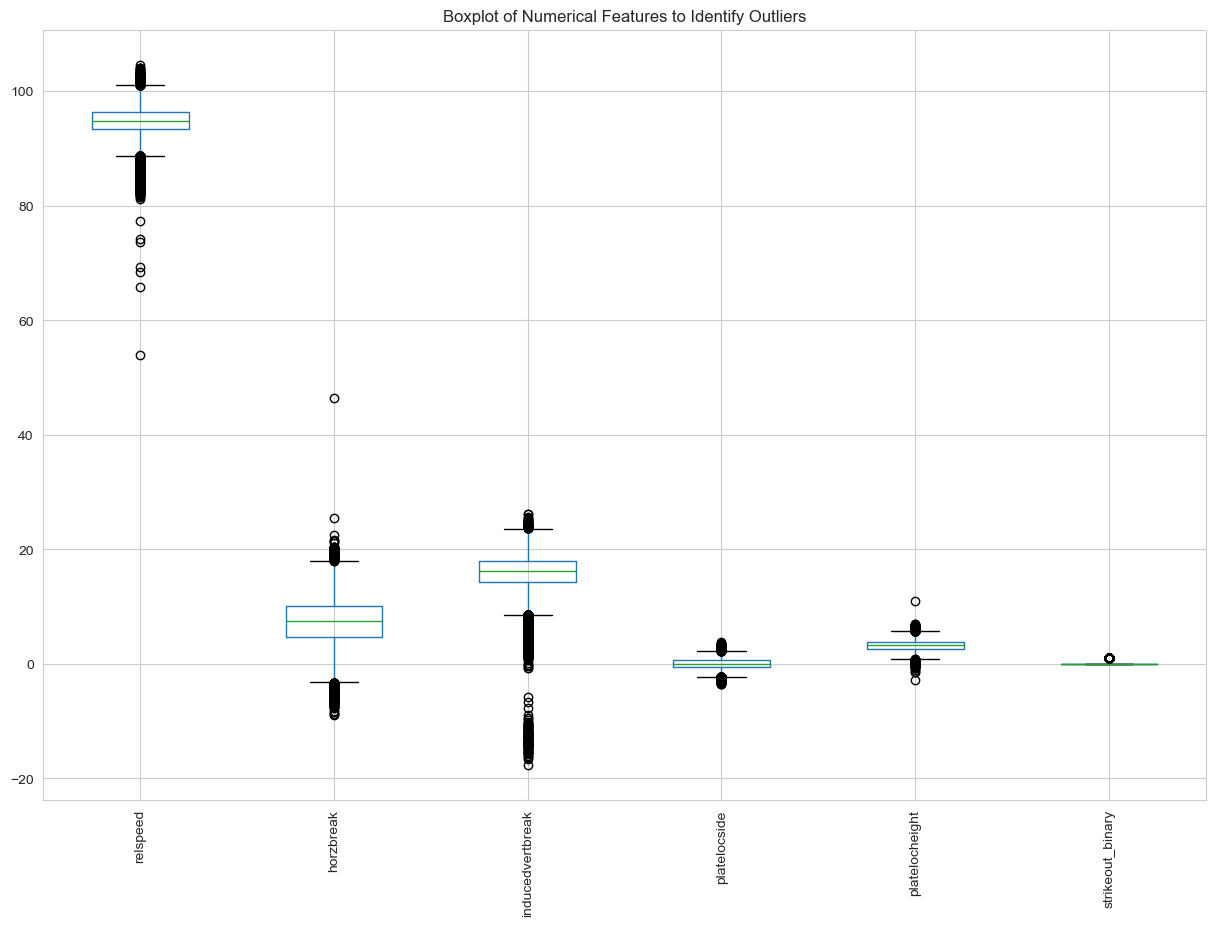

In [40]:
# Select numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns
numerical_data = data[numerical_features]
numerical_data = data[[col for col in numerical_features if col != 'spinrate']]

# Plot boxplots for numerical features to visualize outliers
plt.figure(figsize=(15, 10))
numerical_data.boxplot(rot=90)
plt.title('Boxplot of Numerical Features to Identify Outliers')
plt.show()

In [41]:
# numerical_data = data[numerical_features]
# 
# # Function to remove outliers using the IQR method
# def remove_outliers_iqr(data, columns, threshold=100):
#     cleaned_data = data.copy()
#     for column in columns:
#         Q1 = cleaned_data[column].quantile(0.25)
#         Q3 = cleaned_data[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - threshold * IQR
#         upper_bound = Q3 + threshold * IQR
#         # Remove rows with outliers
#         cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
#     return cleaned_data
# 
# # Remove outliers from the numerical features
# cleaned_data = remove_outliers_iqr(numerical_data, numerical_features)
# 
# # Display the shape of the dataset before and after removing outliers
# original_shape = numerical_data.shape
# cleaned_shape = cleaned_data.shape
# 
# original_shape, cleaned_shape

In [42]:
# Function to remove outliers using the IQR method for a given dataset
def remove_outliers_iqr_classwise(data, columns, threshold=1.5):
    cleaned_data = data.copy()
    for column in columns:
        Q1 = cleaned_data[column].quantile(0.25)
        Q3 = cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        # Remove rows with outliers
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    return cleaned_data

# Separate the data into classes
strikeout_data = data[data['strikeout_binary'] == 1]
non_strikeout_data = data[data['strikeout_binary'] == 0]

# Remove outliers separately for each class
strikeout_data_cleaned = remove_outliers_iqr_classwise(strikeout_data, numerical_features)
non_strikeout_data_cleaned = remove_outliers_iqr_classwise(non_strikeout_data, numerical_features)

# Concatenate the cleaned data from both classes
cleaned_data_classwise = pd.concat([strikeout_data_cleaned, non_strikeout_data_cleaned])

# Check the distribution of the target variable in the cleaned dataset
strikeout_distribution_classwise = cleaned_data_classwise['strikeout_binary'].value_counts()
strikeout_distribution_classwise


strikeout_binary
0    53010
1    13350
Name: count, dtype: int64

### Looking @ histograms of features in nonstrike/strike scenarios:
- I don't think spinrate, release speed, or horz break on their own have meaningful differences
- I'm going to try combining vertical break & release speed 
- I think platelocside and platelocheight are going to be the most important 


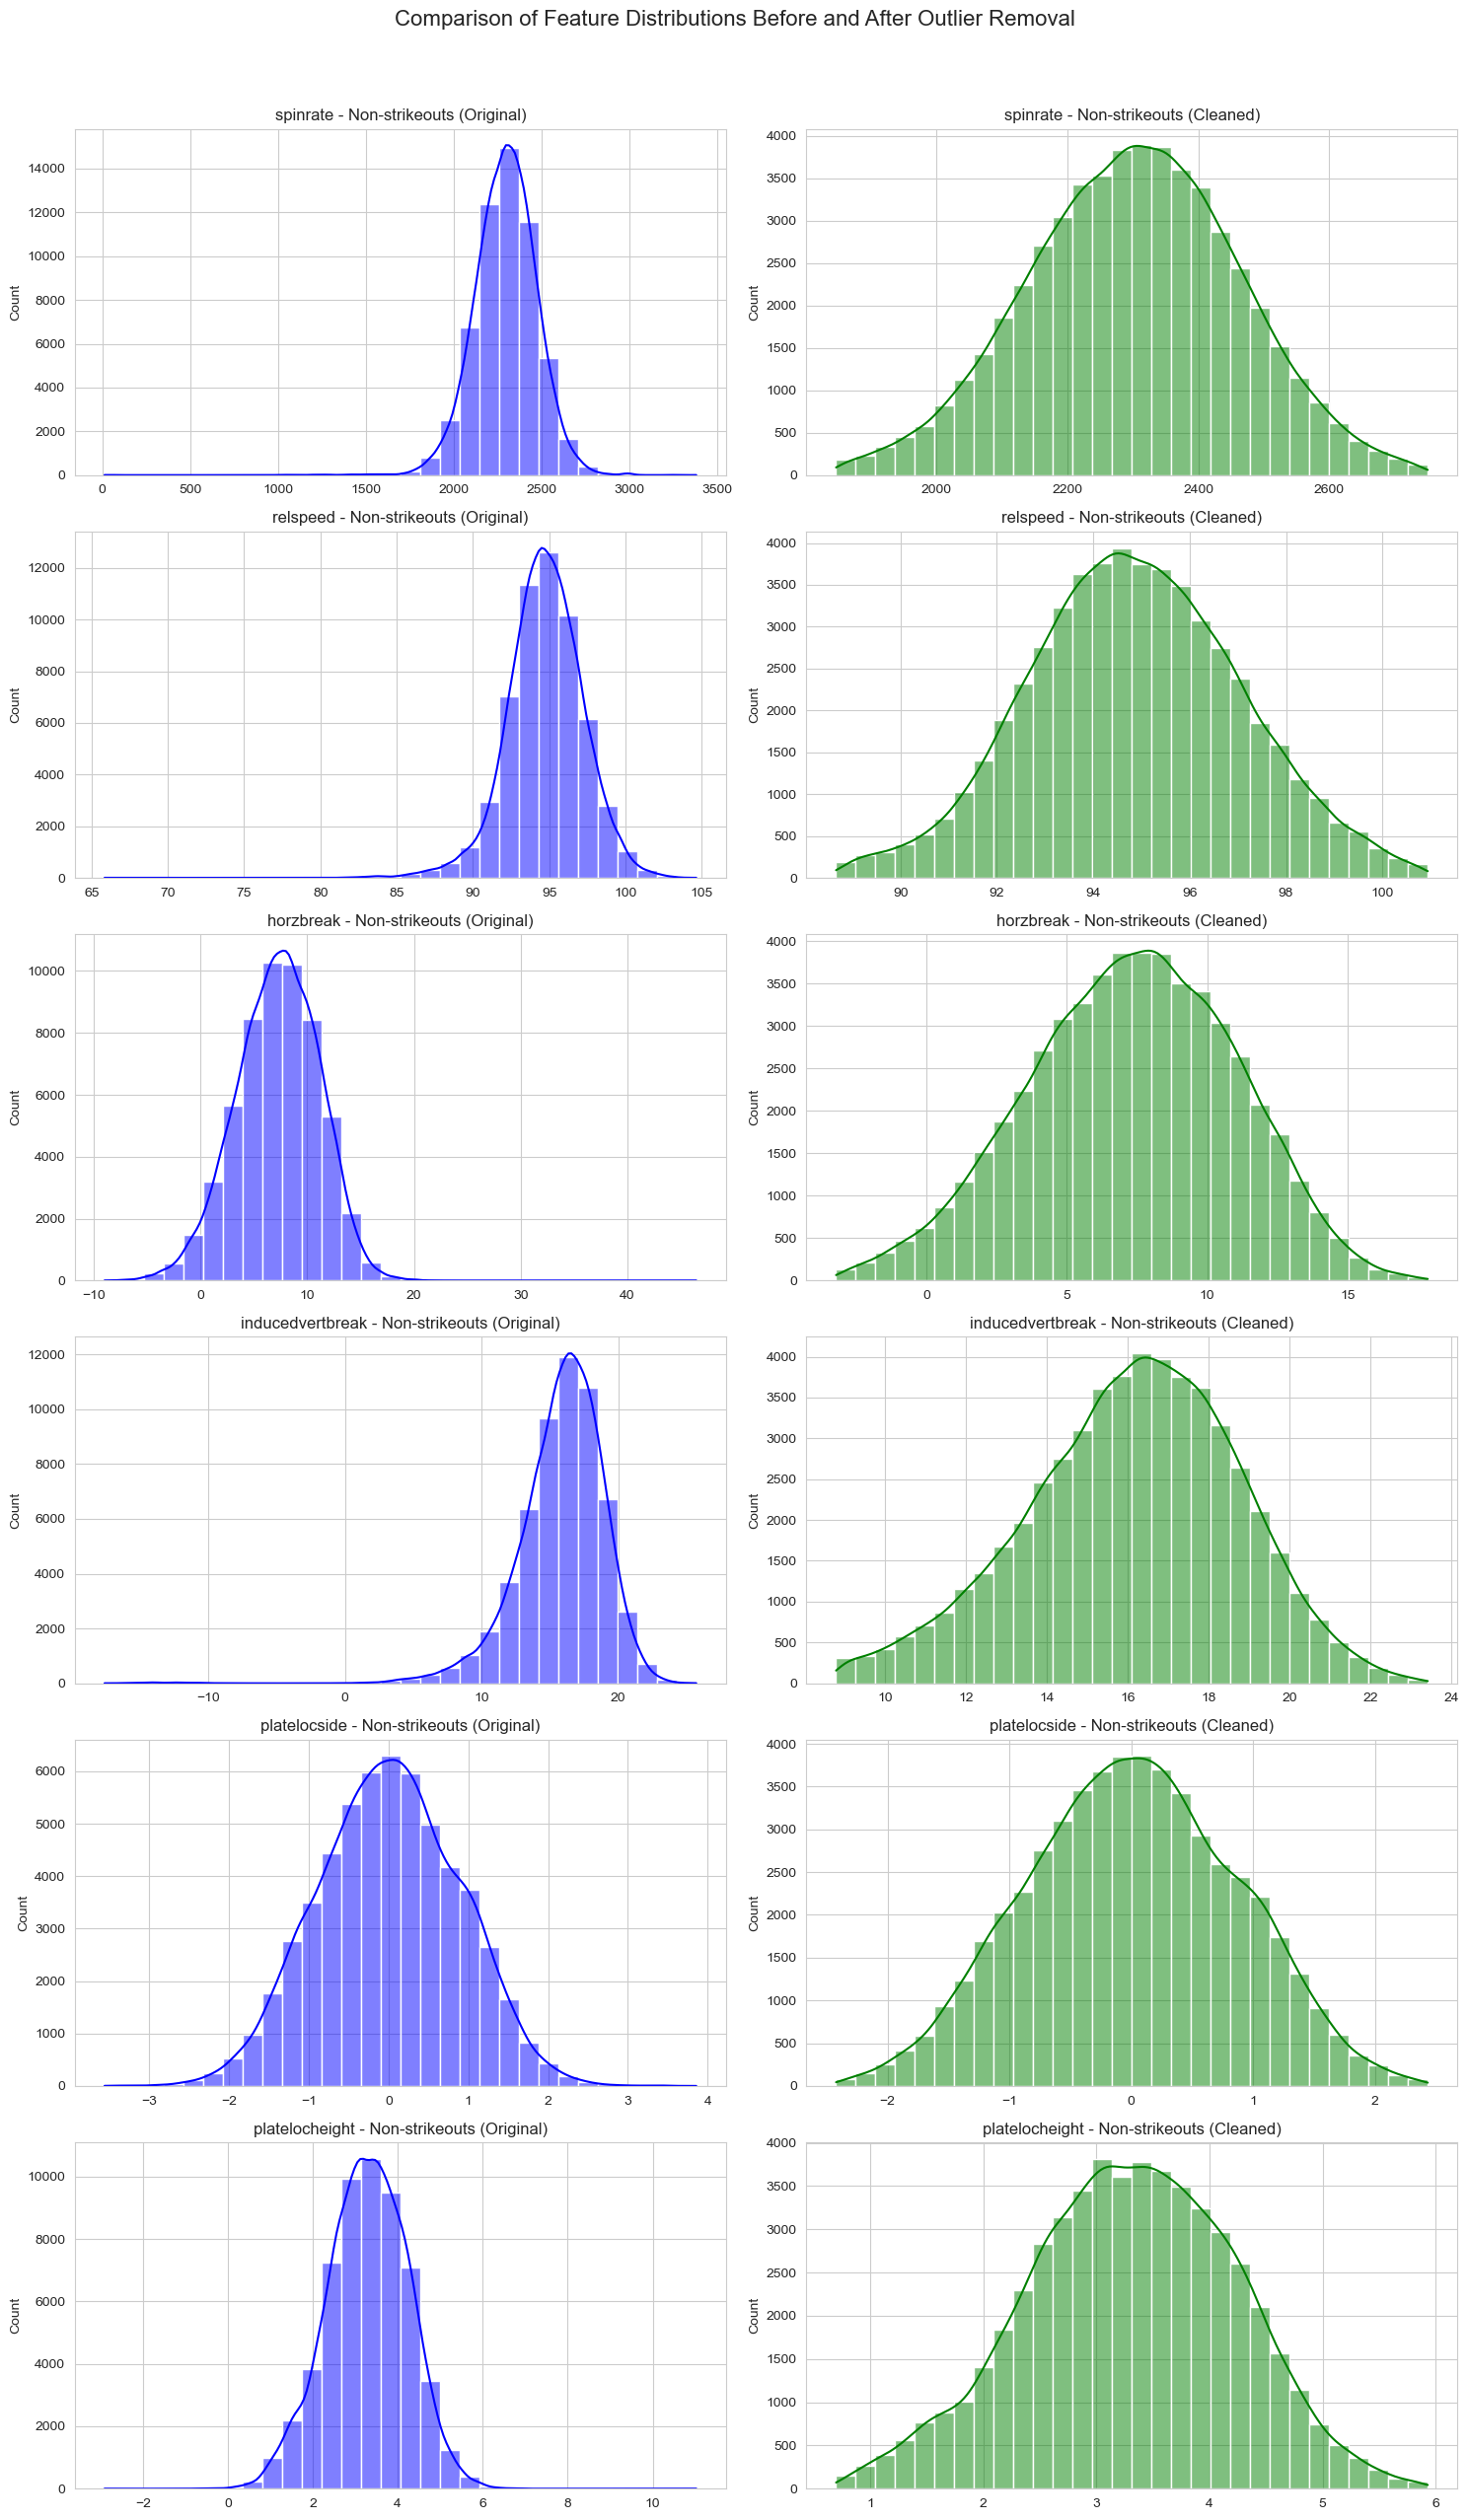

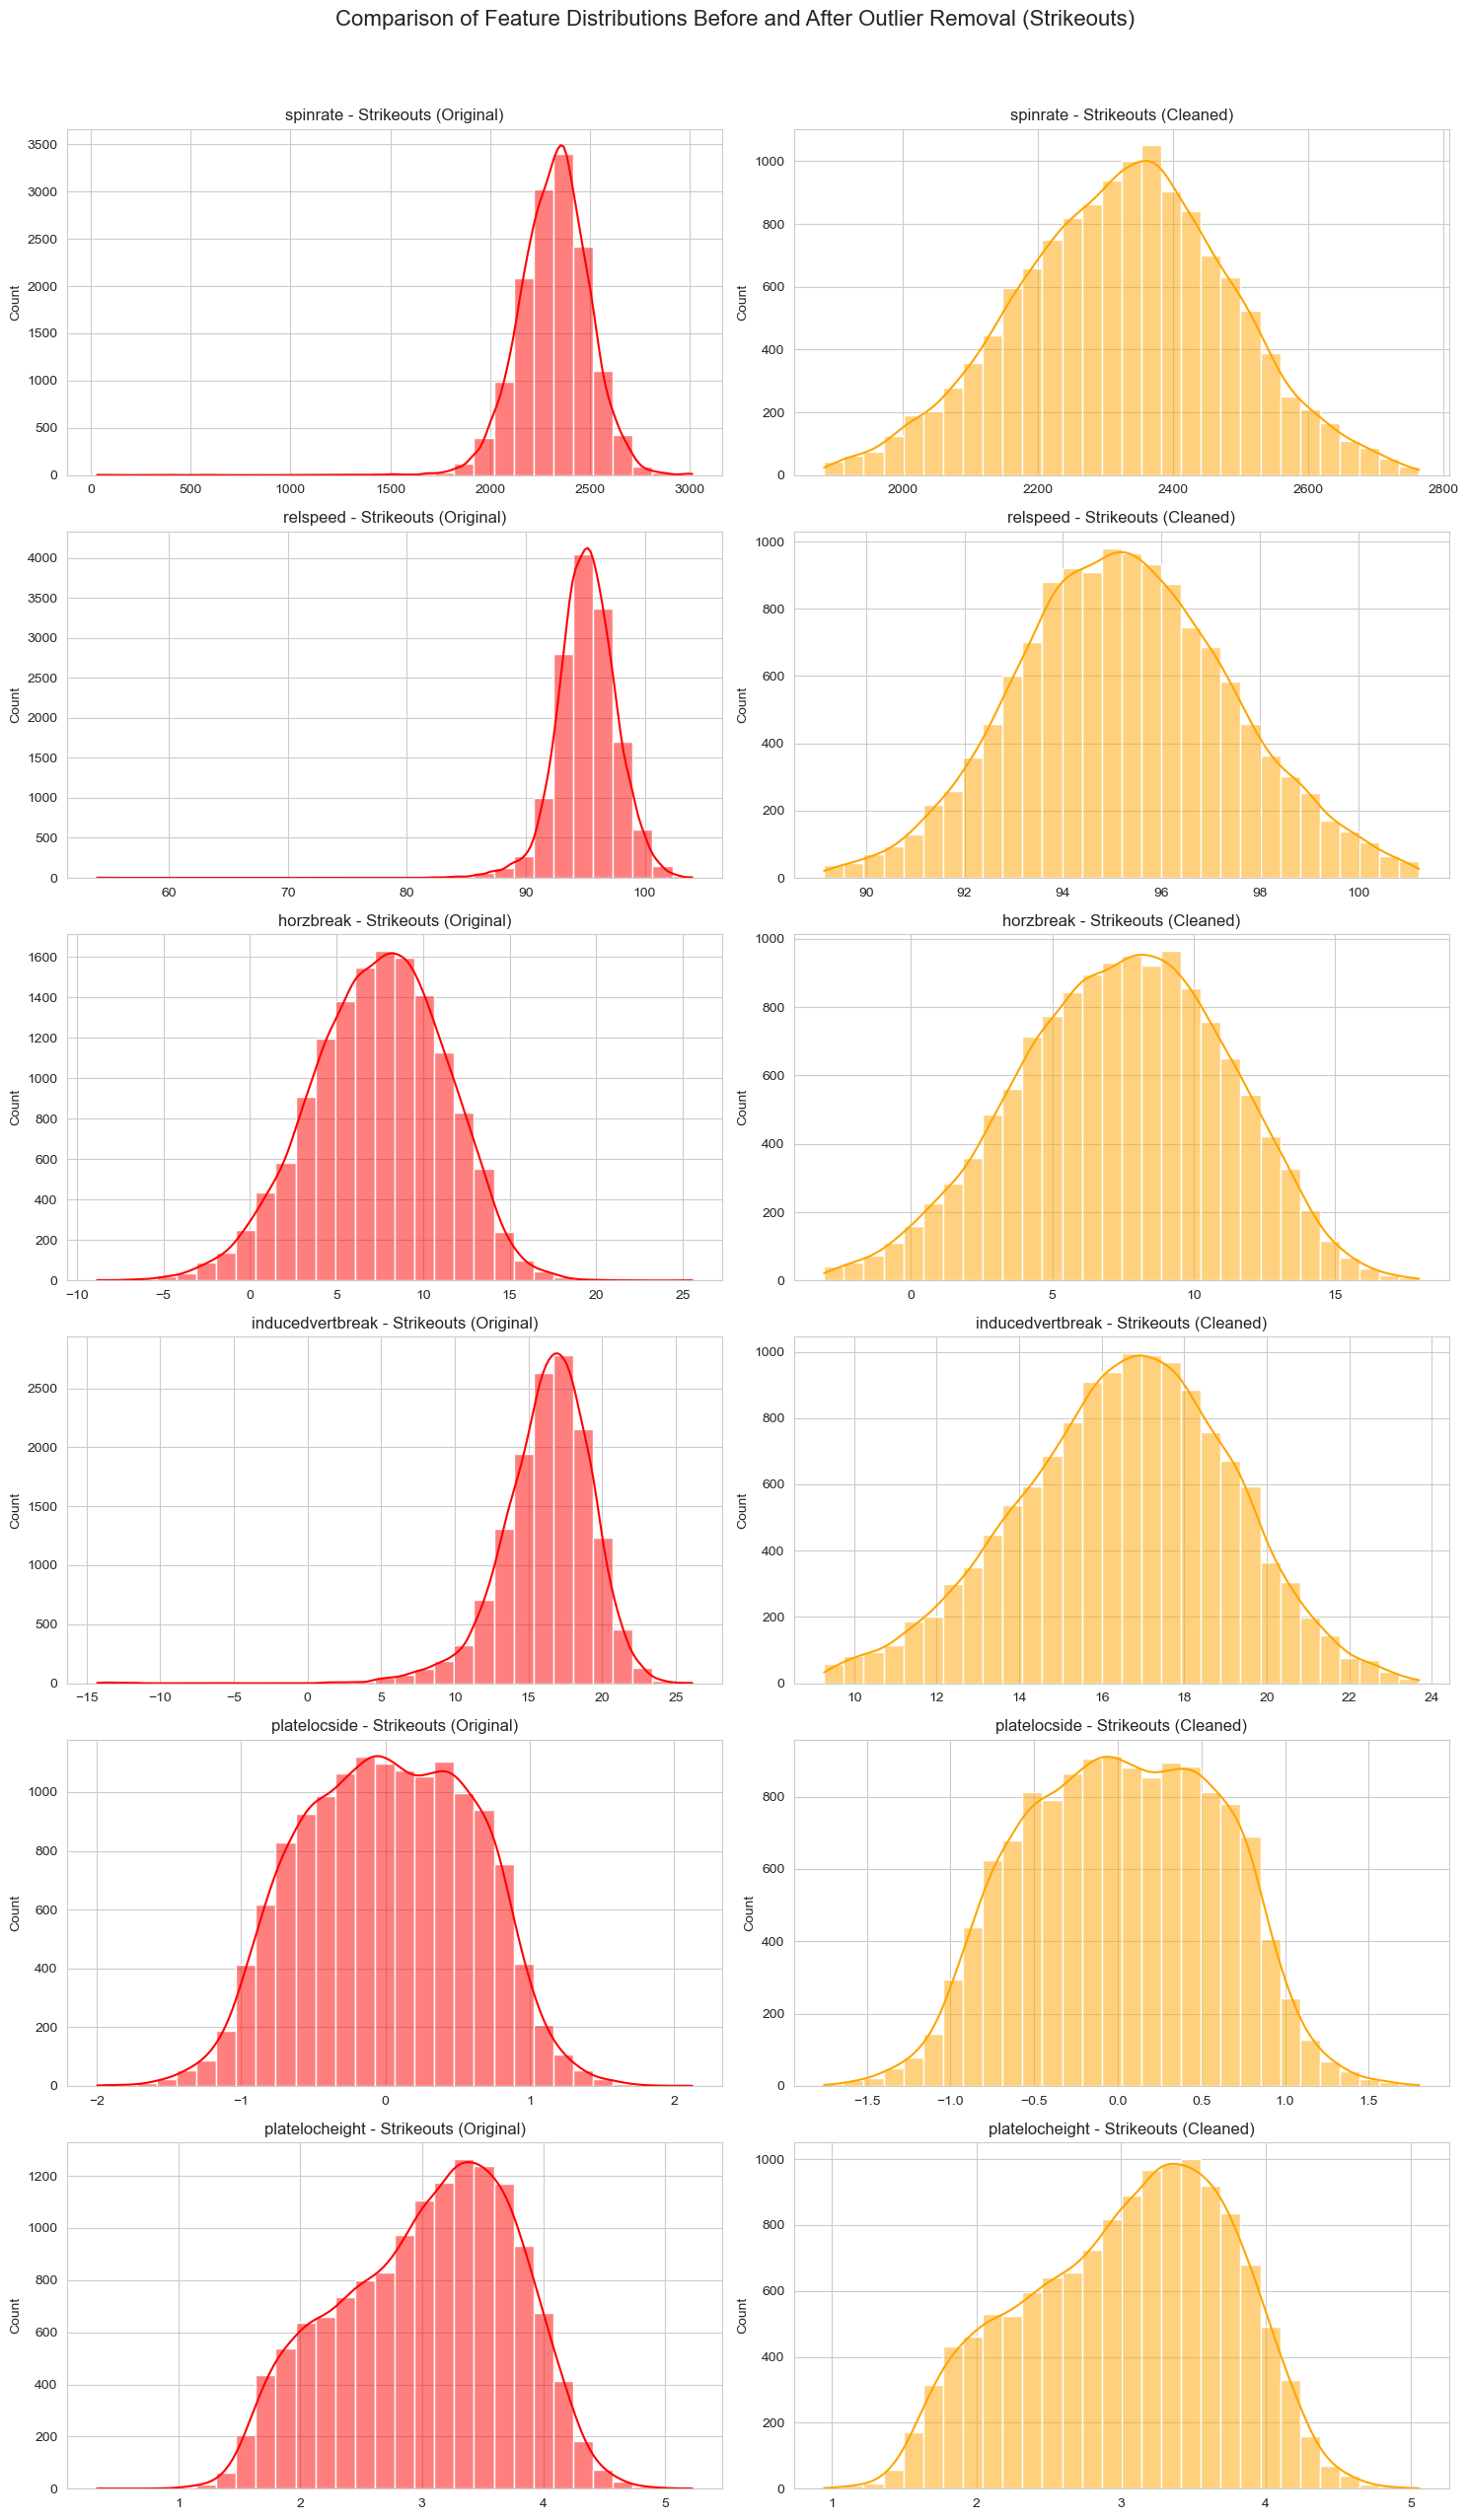

In [43]:
# Plot histograms of numerical features before and after outlier removal for non-strikeouts and strikeouts

# Original strikeout and non-strikeout data
original_strikeout_data = data[data['strikeout_binary'] == 1]
original_non_strikeout_data = data[data['strikeout_binary'] == 0]

# Features to visualize
features_to_visualize = ['spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 'platelocside', 'platelocheight']

# Plot before and after for each feature
fig, axes = plt.subplots(len(features_to_visualize), 2, figsize=(15, 25))
fig.suptitle('Comparison of Feature Distributions Before and After Outlier Removal', fontsize=16, y=1.02)

for i, feature in enumerate(features_to_visualize):
    # Original data (non-strikeouts)
    sns.histplot(original_non_strikeout_data[feature], bins=30, kde=True, color='blue', ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} - Non-strikeouts (Original)')
    axes[i, 0].set_xlabel('')

    # Cleaned data (non-strikeouts)
    sns.histplot(non_strikeout_data_cleaned[feature], bins=30, kde=True, color='green', ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} - Non-strikeouts (Cleaned)')
    axes[i, 1].set_xlabel('')

plt.tight_layout()
plt.show()

# Plot for strikeouts
fig, axes = plt.subplots(len(features_to_visualize), 2, figsize=(15, 25))
fig.suptitle('Comparison of Feature Distributions Before and After Outlier Removal (Strikeouts)', fontsize=16, y=1.02)

for i, feature in enumerate(features_to_visualize):
    # Original data (strikeouts)
    sns.histplot(original_strikeout_data[feature], bins=30, kde=True, color='red', ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} - Strikeouts (Original)')
    axes[i, 0].set_xlabel('')

    # Cleaned data (strikeouts)
    sns.histplot(strikeout_data_cleaned[feature], bins=30, kde=True, color='orange', ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} - Strikeouts (Cleaned)')
    axes[i, 1].set_xlabel('')

plt.tight_layout()
plt.show()


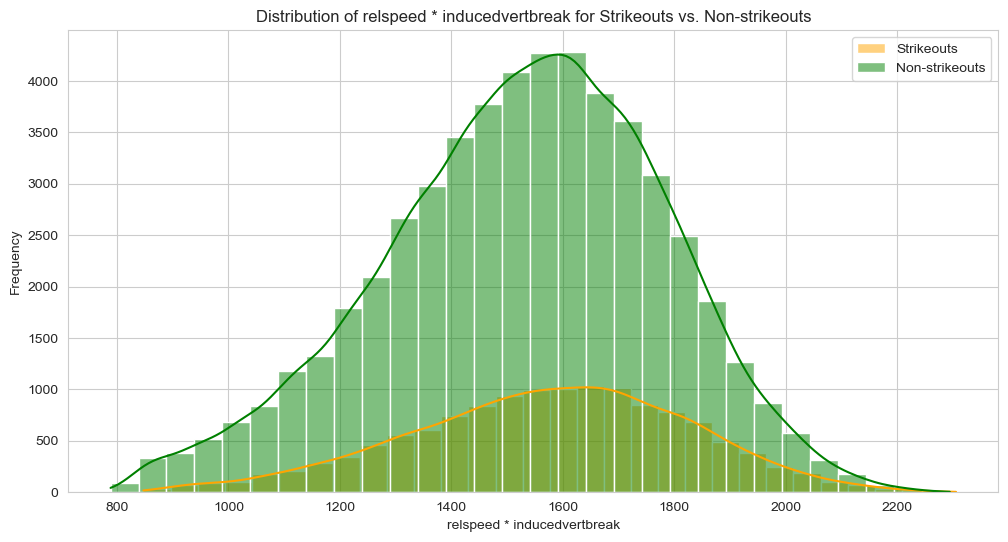

In [44]:
# Create a new variable that is relspeed and inducedvertbreak multiplied together
cleaned_data_classwise['relspeed_inducedvertbreak'] = cleaned_data_classwise['relspeed'] * cleaned_data_classwise['inducedvertbreak']

# Separate data into strikeouts and non-strikeouts
strikeout_data = cleaned_data_classwise[cleaned_data_classwise['strikeout_binary'] == 1]
non_strikeout_data = cleaned_data_classwise[cleaned_data_classwise['strikeout_binary'] == 0]

# Plot the distribution of the new variable for strikeouts and non-strikeouts
plt.figure(figsize=(12, 6))
sns.histplot(strikeout_data['relspeed_inducedvertbreak'], bins=30, kde=True, color='orange', label='Strikeouts')
sns.histplot(non_strikeout_data['relspeed_inducedvertbreak'], bins=30, kde=True, color='green', label='Non-strikeouts')
plt.title('Distribution of relspeed * inducedvertbreak for Strikeouts vs. Non-strikeouts')
plt.xlabel('relspeed * inducedvertbreak')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [45]:
feature_columns = [
        'spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 
        'platelocside', 'platelocheight', 'relspeed_inducedvertbreak'
    ]
cleaned_data_classwise[feature_columns].corr()

,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,relspeed_inducedvertbreak
spinrate,1.000000,0.223240,-0.072689,0.230890,0.043079,-0.074704,0.260934
relspeed,0.223240,1.000000,0.139251,0.035490,0.041663,-0.130704,0.175831
horzbreak,-0.072689,0.139251,1.000000,-0.157477,-0.111029,-0.069772,-0.137314
inducedvertbreak,0.230890,0.035490,-0.157477,1.000000,0.030193,0.012916,0.989757
platelocside,0.043079,0.041663,-0.111029,0.030193,1.000000,-0.272597,0.035725
platelocheight,-0.074704,-0.130704,-0.069772,0.012916,-0.272597,1.000000,-0.006031
relspeed_inducedvertbreak,0.260934,0.175831,-0.137314,0.989757,0.035725,-0.006031,1.000000


### If I want to keep just the interaction term:

In [46]:
# # Add the new variable to the DataFrame
# # cleaned_data_classwise['VelocityBreakProduct'] = cleaned_data_classwise['relspeed'] * cleaned_data_classwise['inducedvertbreak']
# 
# # Remove the original 'relspeed' and 'inducedvertbreak' columns
# cleaned_data_classwise = cleaned_data_classwise.drop(columns=['relspeed', 'inducedvertbreak'])
# 
# # Display the first few rows of the updated DataFrame to confirm the changes
cleaned_data_classwise.head()
cleaned_data_classwise.to_csv('baseball_stuff.csv', index=False)

### More feature engineering: Making a new col 
- this col averages each pitcher's average velocity and takes into acc on a pitch by pitch basis, how much the velo differs from the pitcher's regular speed

In [47]:
# Calculate the pitcher's average release speed
cleaned_data_classwise['average_relspeed'] = cleaned_data_classwise.groupby('pitcher')['relspeed'].transform('mean')

# Calculate the difference between each pitch's release speed and the pitcher's average release speed
cleaned_data_classwise['relspeed_diff'] = cleaned_data_classwise['relspeed'] - cleaned_data_classwise['average_relspeed']

In [48]:
cleaned_data_classwise

,pitcher,pitchname,pitchresult,eventtype,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,strikeout_binary,relspeed_inducedvertbreak,average_relspeed,relspeed_diff
25,"Gallen, Zac",FF,C,strikeout,2502.240234,94.112892,2.462363,18.226583,0.433979,2.300865,1,1715.356485,93.776474,0.336418
40,"Gray, Jon",FF,C,strikeout,2257.527588,96.098084,9.364018,18.195126,-0.346139,1.675238,1,1748.516697,96.046525,0.051559
72,"Junis, Jakob",FF,S,strikeout,2309.158691,91.561516,1.715053,9.608547,0.747100,3.573272,1,879.773147,91.839837,-0.278321
94,"Giolito, Lucas",FF,S,strikeout,2442.560303,93.514725,5.891717,17.998758,-0.187572,3.245606,1,1683.148930,93.600082,-0.085357
103,"Giolito, Lucas",FF,C,strikeout,2338.321289,94.639954,11.088030,17.145796,0.667325,3.362605,1,1622.677321,93.600082,1.039872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187396,"Greinke, Zack",FF,F,foul,2292.262451,90.186073,2.907715,17.270081,-0.060285,3.277781,0,1557.520752,90.243108,-0.057035
187398,"Alcantara, Sandy",FF,E,home_run,2341.313232,99.597092,13.290255,14.944304,-0.707683,3.001816,0,1488.409262,98.662289,0.934803
187402,"Pfaadt, Brandon",FF,D,single,2501.821533,94.116440,3.854095,14.275191,0.586442,1.884596,0,1343.530184,94.251875,-0.135435
187403,"Gallegos, Giovanny",FF,B,ball,2398.320557,93.521347,10.798670,14.733393,-0.807034,4.470551,0,1377.886734,94.253438,-0.732091


## Logistic Regression

In [49]:
# Simplify pitchresult into broader categories
def categorize_pitchresult(pitchresult):
    if pitchresult in ['S', 'C']:  # Likely strike-related
        return 'strike_related'
    elif pitchresult in ['X', 'D', 'T', 'O']:  # In-play outcomes
        return 'in_play'
    elif pitchresult in ['B', 'W']:  # Balls and walks
        return 'ball_related'
    elif pitchresult == 'F':  # Foul
        return 'foul'
    else:  # Other miscellaneous outcomes
        return 'other'

# Apply categorization
cleaned_data_classwise['pitchresult_category'] = cleaned_data_classwise['pitchresult'].apply(categorize_pitchresult)

# One-hot encode the new categorical columns for logistic regression
data_encoded = pd.get_dummies(cleaned_data_classwise, columns=['pitchresult_category'], drop_first=True)

# Define the new feature set including the encoded pitchresult categories and original features
feature_columns = [
        'spinrate', 'average_relspeed', 'relspeed_diff', 'horzbreak', 'inducedvertbreak', 
        'platelocside', 'platelocheight', 'relspeed_inducedvertbreak'
    ] # + [col for col in data_encoded.columns if 'pitchresult_category_' in col]

# Separate features and target
X = data_encoded[feature_columns]
y = data_encoded['strikeout_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model with class weights to handle imbalance
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

accuracy, precision, recall, roc_auc

(0.5734880450070323,
 0.2501931354155171,
 0.5718970736629667,
 0.6098561318044031)

### OverSampling

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = cleaned_data_classwise[[
        'spinrate', 'average_relspeed', 'relspeed_diff', 'horzbreak', 'inducedvertbreak', 
        'platelocside', 'platelocheight', 'relspeed_inducedvertbreak'
    ]]
y = cleaned_data_classwise['strikeout_binary']  # assuming you have a column that indicates if the outcome was a strikeout (0 or 1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train logistic regression model with class weights to handle imbalance
log_reg = LogisticRegression(max_iter=1000,  class_weight={0: 1, 1: 0.94})
# log_reg = LogisticRegression(max_iter=1000,  class_weight="balanced")

log_reg.fit(X_resampled, y_resampled)

# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

accuracy, precision, recall, roc_auc

(0.6054249547920434,
 0.25608290778011417,
 0.5169799878714373,
 0.6082309069577181)

In [51]:
# X_train

### Looking at the Coefficients

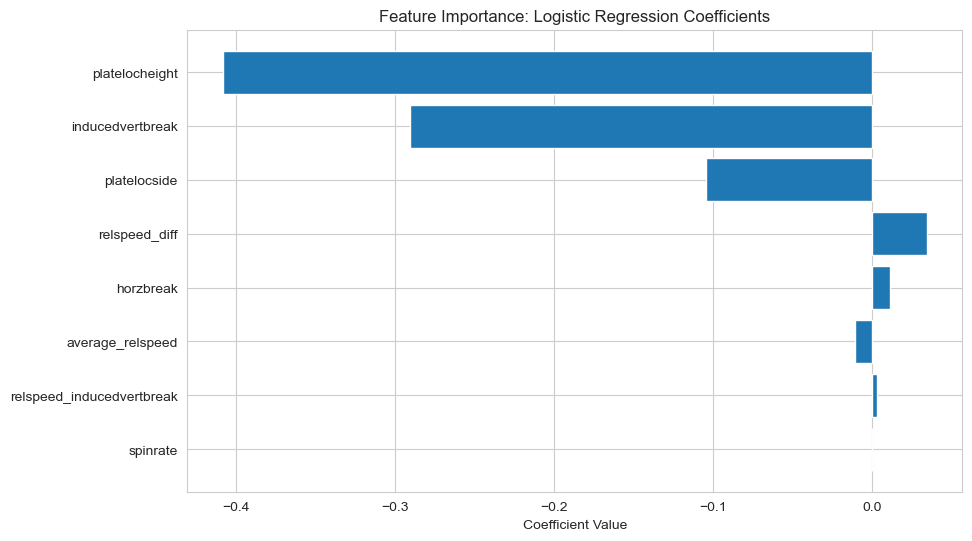

,Feature,Coefficient
6,platelocheight,-0.408667
4,inducedvertbreak,-0.290823
5,platelocside,-0.104590
2,relspeed_diff,0.035047
3,horzbreak,0.011834
1,average_relspeed,-0.010154
7,relspeed_inducedvertbreak,0.003694
0,spinrate,0.000492


In [52]:
# Get the feature names and coefficients
feature_names = X_train.columns
coefficients = log_reg.coef_[0]

# Create a DataFrame for easier interpretation
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot the coefficients for visual clarity
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance: Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()

feature_importance

## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model with class weights to handle imbalance
rf_model = RandomForestClassifier(n_estimators=100, class_weight={0: 1, 1: 2}, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

accuracy_rf, precision_rf, recall_rf, roc_auc_rf

(0.8006630500301386,
 0.4844290657439446,
 0.04244996967859309,
 0.7149382727145479)

In [54]:
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
# 
# # Load the data
# # df = pd.read_csv(file_path)
# 
# # Simplify pitchresult into broader categories
# df['pitchresult_category'] = df['pitchresult'].apply(categorize_pitchresult)
# 
# # One-hot encode the new categorical columns for logistic regression
# data_encoded = pd.get_dummies(df, columns=['pitchresult_category'], drop_first=True)
# 
# # Define the new feature set including the encoded pitchresult categories and original features
# feature_columns = [
#     'spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 
#     'platelocside', 'platelocheight'
# ] + [col for col in data_encoded.columns if 'pitchresult_category_' in col]
# 
# # Separate features and target
# X = data_encoded[feature_columns]
# y = data_encoded['strikeout_binary']
# 
# # Oversample the minority class using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)
# 
# # Feature scaling
# scaler = StandardScaler()
# X_resampled_scaled = scaler.fit_transform(X_resampled)
# 
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.3, random_state=42)
# 
# # Train Random Forest model with class weights to handle imbalance
# rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
# rf_model.fit(X_train, y_train)
# 
# # Make predictions
# y_pred_rf = rf_model.predict(X_test)
# y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]
# 
# # Evaluate the Random Forest model
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# precision_rf = precision_score(y_test, y_pred_rf, zero_division=1)
# recall_rf = recall_score(y_test, y_pred_rf)
# roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
# 
# accuracy_rf, precision_rf, recall_rf, roc_auc_rf

In [55]:
# X_train

In [56]:
# X_resampled

### DownSampling with RandomForest

In [140]:
from imblearn.over_sampling import SMOTE
# Define the new feature set excluding the encoded pitchresult categories to avoid data leakage
feature_columns = [
        'spinrate', 'average_relspeed', 'relspeed_diff', 'horzbreak', 'inducedvertbreak', 
        'platelocside', 'platelocheight',  'relspeed_inducedvertbreak'
    ]

# Separate features and target
X = data_encoded[feature_columns]
y = data_encoded['strikeout_binary']

# Concatenate features and target for resampling
data_resampled = pd.concat([X, y], axis=1)

# Separate majority and minority classes
strikeout = data_resampled[data_resampled['strikeout_binary'] == 1]
non_strikeout = data_resampled[data_resampled['strikeout_binary'] == 0]

# Downsample majority class (non-strikeouts)
non_strikeout_downsampled = resample(non_strikeout, 
                                     replace=False,    # sample without replacement
                                     n_samples=len(strikeout),  # match minority class
                                     random_state=42)

# Combine minority class with downsampled majority class
data_balanced = pd.concat([strikeout, non_strikeout_downsampled])

# Separate features and target after resampling
X_balanced = data_balanced.drop('strikeout_binary', axis=1)
y_balanced = data_balanced['strikeout_binary']

# Feature scaling
scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_scaled, y_balanced, test_size=0.3, random_state=42)

# Train Random Forest model with class weights to handle imbalance
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

accuracy_rf, precision_rf, recall_rf, roc_auc_rf

(0.6644194756554307, 0.6405132519983172, 0.7567097415506958, 0.716086633734971)

In [63]:
data_resampled

,spinrate,average_relspeed,relspeed_diff,horzbreak,inducedvertbreak,platelocside,platelocheight,relspeed_inducedvertbreak,strikeout_binary
25,2502.240234,93.776474,0.336418,2.462363,18.226583,0.433979,2.300865,1715.356485,1
40,2257.527588,96.046525,0.051559,9.364018,18.195126,-0.346139,1.675238,1748.516697,1
72,2309.158691,91.839837,-0.278321,1.715053,9.608547,0.747100,3.573272,879.773147,1
94,2442.560303,93.600082,-0.085357,5.891717,17.998758,-0.187572,3.245606,1683.148930,1
103,2338.321289,93.600082,1.039872,11.088030,17.145796,0.667325,3.362605,1622.677321,1
...,...,...,...,...,...,...,...,...,...
187396,2292.262451,90.243108,-0.057035,2.907715,17.270081,-0.060285,3.277781,1557.520752,0
187398,2341.313232,98.662289,0.934803,13.290255,14.944304,-0.707683,3.001816,1488.409262,0
187402,2501.821533,94.251875,-0.135435,3.854095,14.275191,0.586442,1.884596,1343.530184,0
187403,2398.320557,94.253438,-0.732091,10.798670,14.733393,-0.807034,4.470551,1377.886734,0


In [64]:
# Interaction between spinrate and relspeed
data_encoded['spinrate_relspeed'] = data_encoded['spinrate'] * data_encoded['relspeed']

# Movement Ratio between horizontal and vertical break
data_encoded['movement_ratio'] = data_encoded['horzbreak'] / (data_encoded['inducedvertbreak'] + 1e-5)

# Normalize plate location to capture if the pitch is at the edge of the strike zone
data_encoded['is_edge_pitch'] = (
    (data_encoded['platelocside'].abs() > 0.7) |  # Assuming a threshold for edge pitches
    (data_encoded['platelocheight'] < 1.5) | 
    (data_encoded['platelocheight'] > 3.5)
).astype(int)

In [65]:
data_encoded

,pitcher,pitchname,pitchresult,eventtype,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,...,relspeed_inducedvertbreak,average_relspeed,relspeed_diff,pitchresult_category_foul,pitchresult_category_in_play,pitchresult_category_other,pitchresult_category_strike_related,spinrate_relspeed,movement_ratio,is_edge_pitch
25,"Gallen, Zac",FF,C,strikeout,2502.240234,94.112892,2.462363,18.226583,0.433979,2.300865,...,1715.356485,93.776474,0.336418,False,False,False,True,235493.065276,0.135097,0
40,"Gray, Jon",FF,C,strikeout,2257.527588,96.098084,9.364018,18.195126,-0.346139,1.675238,...,1748.516697,96.046525,0.051559,False,False,False,True,216944.074655,0.514644,0
72,"Junis, Jakob",FF,S,strikeout,2309.158691,91.561516,1.715053,9.608547,0.747100,3.573272,...,879.773147,91.839837,-0.278321,False,False,False,True,211430.069994,0.178492,1
94,"Giolito, Lucas",FF,S,strikeout,2442.560303,93.514725,5.891717,17.998758,-0.187572,3.245606,...,1683.148930,93.600082,-0.085357,False,False,False,True,228415.354371,0.327340,0
103,"Giolito, Lucas",FF,C,strikeout,2338.321289,94.639954,11.088030,17.145796,0.667325,3.362605,...,1622.677321,93.600082,1.039872,False,False,False,True,221298.618316,0.646691,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187396,"Greinke, Zack",FF,F,foul,2292.262451,90.186073,2.907715,17.270081,-0.060285,3.277781,...,1557.520752,90.243108,-0.057035,True,False,False,False,206730.149429,0.168367,0
187398,"Alcantara, Sandy",FF,E,home_run,2341.313232,99.597092,13.290255,14.944304,-0.707683,3.001816,...,1488.409262,98.662289,0.934803,False,False,True,False,233187.988596,0.889318,1
187402,"Pfaadt, Brandon",FF,D,single,2501.821533,94.116440,3.854095,14.275191,0.586442,1.884596,...,1343.530184,94.251875,-0.135435,False,True,False,False,235462.535751,0.269985,0
187403,"Gallegos, Giovanny",FF,B,ball,2398.320557,93.521347,10.798670,14.733393,-0.807034,4.470551,...,1377.886734,94.253438,-0.732091,False,False,False,False,224294.169148,0.732938,1


In [66]:
# Create new engineered features

# Interaction between spinrate and relspeed
data_encoded['spinrate_relspeed'] = data_encoded['spinrate'] * data_encoded['relspeed']

# Movement Ratio between horizontal and vertical break
data_encoded['movement_ratio'] = data_encoded['horzbreak'] / (data_encoded['inducedvertbreak'] + 1e-5)

# Normalize plate location to capture if the pitch is at the edge of the strike zone
data_encoded['is_edge_pitch'] = (
    (data_encoded['platelocside'].abs() > 0.7) |  # Assuming a threshold for edge pitches
    (data_encoded['platelocheight'] < 1.5) | 
    (data_encoded['platelocheight'] > 3.5)
).astype(int)

# Update the feature columns to include the new engineered features
feature_columns = [ # , 'average_relspeed'
        'spinrate', 'relspeed_diff', 'horzbreak', 'inducedvertbreak', 
        'platelocside', 'platelocheight', '/', 'is_edge_pitch'
    ]

# Separate features and target
X = data_encoded[feature_columns]
y = data_encoded['strikeout_binary']

# Concatenate features and target for resampling
data_resampled = pd.concat([X, y], axis=1)

# Separate majority and minority classes
strikeout = data_resampled[data_resampled['strikeout_binary'] == 1]
non_strikeout = data_resampled[data_resampled['strikeout_binary'] == 0]

# Downsample majority class (non-strikeouts)
non_strikeout_downsampled = resample(non_strikeout, 
                                     replace=False,    # sample without replacement
                                     n_samples=len(strikeout),  # match minority class
                                     random_state=42)

# Combine minority class with downsampled majority class
data_balanced = pd.concat([strikeout, non_strikeout_downsampled])

# Separate features and target after resampling
X_balanced = data_balanced.drop('strikeout_binary', axis=1)
y_balanced = data_balanced['strikeout_binary']

# Feature scaling
scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_scaled, y_balanced, test_size=0.3, random_state=42)

# Train Random Forest model with class weights to handle imbalance
rf_model = RandomForestClassifier(n_estimators=1000, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

accuracy_rf, precision_rf, recall_rf, roc_auc_rf

KeyError: "['/'] not in index"

In [ ]:
X_balanced

## XGBoost 

In [67]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the tuned XGBoost model
y_pred_best_xgb = best_xgb_model.predict(X_test)
y_pred_best_xgb_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the tuned XGBoost model
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
precision_best_xgb = precision_score(y_test, y_pred_best_xgb, zero_division=1)
recall_best_xgb = recall_score(y_test, y_pred_best_xgb)
roc_auc_best_xgb = roc_auc_score(y_test, y_pred_best_xgb_proba)

best_params, accuracy_best_xgb, precision_best_xgb, recall_best_xgb, roc_auc_best_xgb


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:01:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:01:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:01:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:01:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, U

({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.7},
 0.6746566791510612,
 0.6324243556219649,
 0.8414512922465208,
 0.7326686207391876)

In [68]:
print(classification_report(y_test, y_pred_best_xgb))

              precision    recall  f1-score   support

           0       0.76      0.51      0.61      3986
           1       0.63      0.84      0.72      4024

    accuracy                           0.67      8010
   macro avg       0.70      0.67      0.66      8010
weighted avg       0.70      0.67      0.67      8010



In [69]:

# Generate the confusion matrix for the tuned XGBoost model (best from RandomizedSearchCV)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_best_xgb)

conf_matrix_xgb

array([[2018, 1968],
       [ 638, 3386]])

In [70]:
X_train

array([[ 1.57669039, -0.03931418,  0.30524036, ..., -1.55972944,
        -0.49592403, -0.2747008 ],
       [-0.61931917, -0.35765525,  0.04731448, ...,  0.74267578,
         1.15058442, -0.04680365],
       [ 0.29192201,  0.95446573,  0.91796859, ...,  0.60679491,
        -1.80090465,  1.05323249],
       ...,
       [ 0.19420086,  1.0707115 ,  0.01318935, ..., -0.3436864 ,
        -1.38007808,  1.04634015],
       [ 0.80886635,  1.51159225,  0.77351569, ..., -1.63694383,
         1.29682199,  0.65333151],
       [ 1.55904887, -0.09084057,  1.20366107, ..., -0.64867471,
        -0.02404389,  0.3336423 ]])

In [71]:
y_pred_best_xgb.shape

(8010,)

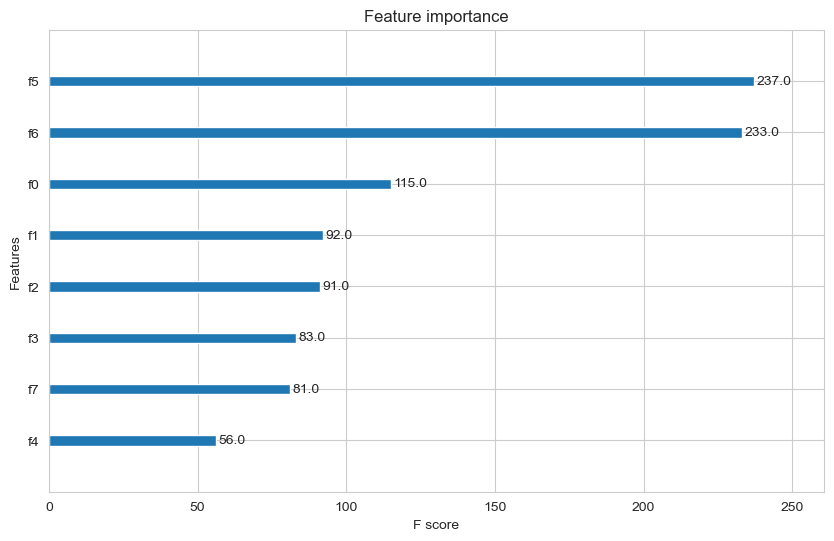

In [75]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot the feature importance
plt.figure(figsize=(10, 6))
plot_importance(best_xgb_model, importance_type='weight', ax=plt.gca())
plt.show()


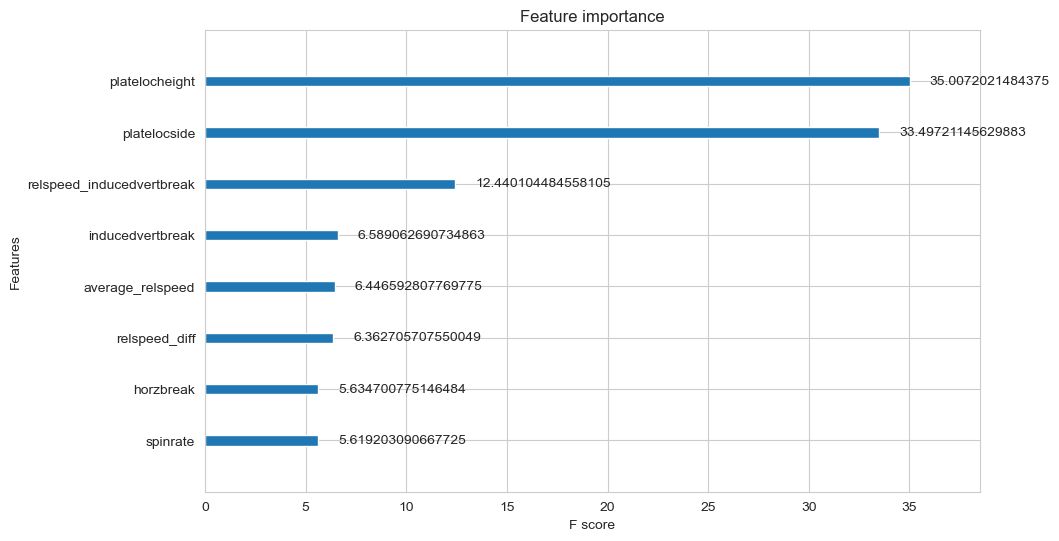

In [73]:
# Create a dictionary to map feature indices to the actual column names
feature_names = {f"f{i}": col for i, col in enumerate(X_balanced.columns)}

# Plot feature importance with renamed features
plt.figure(figsize=(10, 6))
ax = plot_importance(best_xgb_model, importance_type='gain', ax=plt.gca())

# Rename the feature labels
ax.set_yticklabels([feature_names[label.get_text()] for label in ax.get_yticklabels()])
plt.show()

## Attempting to Create a score based on Feature Importance
- Removed pitchers that only had one pitch, because they are irrelevant to our ranking

In [127]:
og_data = data
og_data 

,pitcher,pitchname,pitchresult,eventtype,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,strikeout_binary
4,"Wilson, Bryse",FF,B,ball,2143.301025,94.614914,3.280700,13.794325,1.286732,2.807080,0
10,"Houck, Tanner",FF,F,foul,2164.971191,96.171303,9.286347,7.589095,0.122586,2.129726,0
13,"Barnes, Jacob",FF,D,single,2254.785645,93.305214,-2.640007,12.777637,0.605103,2.710316,0
17,"Houck, Tanner",FF,X,grounded_into_double_play,2082.749023,94.901627,8.153946,6.207467,-0.378895,3.240144,0
23,"Yajure, Miguel",FF,B,ball,2465.145264,90.507637,5.920645,17.932449,-0.729870,4.935426,0
...,...,...,...,...,...,...,...,...,...,...,...
187398,"Alcantara, Sandy",FF,E,home_run,2341.313232,99.597092,13.290255,14.944304,-0.707683,3.001816,0
187399,"Karinchak, James",FF,S,strikeout,2320.230225,94.827782,5.813662,19.101568,-0.477500,4.648829,1
187402,"Pfaadt, Brandon",FF,D,single,2501.821533,94.116440,3.854095,14.275191,0.586442,1.884596,0
187403,"Gallegos, Giovanny",FF,B,ball,2398.320557,93.521347,10.798670,14.733393,-0.807034,4.470551,0


In [128]:
bruh = data_encoded.loc[:, data_encoded.columns.difference(['pitchresult_category_strike_related','pitchresult_category_foul', 'pitchresult_category_in_play', 'pitchresult_category_other', 'pitchresult_category_strikeout', 'pitchresult_category_strikeout_binary', 'movement_ratio'])]

In [132]:
# Filter the data for the desired columns
data = bruh

# Further filtering for FF pitchname and excluding 'field_out' eventtype
data = data[(data['pitchname'] == 'FF') & (~data['eventtype'].isin(['field_out']))]

# Filter to only include scenarios where pitchresult == 'C' (strikeout)
data_strikeout = data[data['pitchresult'] == 'C']

# Define the pitch characteristics for analysis
pitch_characteristics = ["spinrate", "horzbreak", "inducedvertbreak", "platelocside", "platelocheight", 
                         "relspeed", "average_relspeed", "relspeed_diff", "relspeed_inducedvertbreak"]

pitcher_stats = data_strikeout.groupby("pitcher").filter(lambda x: len(x) > 1)

# Group by pitcher and calculate the mean and standard deviation of the pitch characteristics
pitcher_stats = pitcher_stats.groupby("pitcher")[pitch_characteristics].agg(['mean', 'std'])

In [133]:
pitcher_stats.columns

MultiIndex([(                 'spinrate', 'mean'),
            (                 'spinrate',  'std'),
            (                'horzbreak', 'mean'),
            (                'horzbreak',  'std'),
            (         'inducedvertbreak', 'mean'),
            (         'inducedvertbreak',  'std'),
            (             'platelocside', 'mean'),
            (             'platelocside',  'std'),
            (           'platelocheight', 'mean'),
            (           'platelocheight',  'std'),
            (                 'relspeed', 'mean'),
            (                 'relspeed',  'std'),
            (         'average_relspeed', 'mean'),
            (         'average_relspeed',  'std'),
            (            'relspeed_diff', 'mean'),
            (            'relspeed_diff',  'std'),
            ('relspeed_inducedvertbreak', 'mean'),
            ('relspeed_inducedvertbreak',  'std')],
           )

In [135]:
pitcher_stats

spinrate              horzbreak            \
                         mean         std       mean       std   
pitcher                                                          
Abbott, Cory      2281.165487  220.391171  10.172190  1.325929   
Abreu, Bryan      2462.261048  124.907605   8.226328  2.208790   
Adam, Jason       2604.181722   71.960966   9.121601  2.784024   
Adon, Joan        2174.307210   51.847995  11.157805  1.822193   
Alcantara, Sandy  2250.953055   89.434083  11.394299  1.973012   
...                       ...         ...        ...       ...   
Workman, Brandon  2143.713623  133.429116   2.050636  0.281280   
Wright, Kyle      2383.718181  121.025272  11.893744  2.837904   
Yates, Kirby      2319.929036  112.336258  13.144755  1.687645   
Ynoa, Huascar     2192.999390  109.547742   8.186202  0.594966   
deGrom, Jacob     2509.720378   89.322578   9.637349  2.338369   

                 inducedvertbreak           platelocside            \
                             mean       std         mean       std   
pitcher                                                              
Abbott, Cory            16.535922  1.093059     0.475816  0.482646   
Abreu, Bryan            15.790033  1.716068     0.396823  0.472926   
Adam, Jason             18.428019  1.305964     0.135333  0.588946   
Adon, Joan              14.978930  1.811501     0.249155  0.537602   
Alcantara, Sandy        13.852920  1.702981     0.291596  0.570468   
...                           ...       ...          ...       ...   
Workman, Brandon        19.157559  0.330635     0.964893  0.231310   
Wright, Kyle            11.787845  0.784784     0.412813  0.349081   
Yates, Kirby            14.207724  2.230979     0.065813  0.612143   
Ynoa, Huascar           17.292916  1.566855     0.237089  0.817123   
deGrom, Jacob           16.749888  1.428465     0.508491  0.533239   

                 platelocheight             relspeed            \
                           mean       std       mean       std   
pitcher                                                          
Abbott, Cory           2.614981  0.424409  92.245845  0.921327   
Abreu, Bryan           2.476673  0.576564  98.338642  0.790643   
Adam, Jason            2.216994  0.274173  95.506490  0.785304   
Adon, Joan             2.480112  0.503371  95.772302  0.781191   
Alcantara, Sandy       2.483560  0.489053  98.508309  0.885321   
...                         ...       ...        ...       ...   
Workman, Brandon       2.148906  0.185388  92.489910  0.705364   
Wright, Kyle           2.829207  0.609959  94.783335  2.587163   
Yates, Kirby           2.090267  0.368113  94.002164  0.744081   
Ynoa, Huascar          2.091945  0.245704  97.819542  0.700163   
deGrom, Jacob          2.306807  0.544661  99.659141  0.808218   

                 average_relspeed      relspeed_diff            \
                             mean  std          mean       std   
pitcher                                                          
Abbott, Cory            92.159812  0.0      0.086033  0.921327   
Abreu, Bryan            98.038198  0.0      0.300444  0.790643   
Adam, Jason             95.359370  0.0      0.147121  0.785304   
Adon, Joan              95.730411  0.0      0.041891  0.781191   
Alcantara, Sandy        98.662289  0.0     -0.153980  0.885321   
...                           ...  ...           ...       ...   
Workman, Brandon        91.609333  0.0      0.880577  0.705364   
Wright, Kyle            95.200418  0.0     -0.417083  2.587163   
Yates, Kirby            93.809906  0.0      0.192259  0.744081   
Ynoa, Huascar           97.225974  0.0      0.593568  0.700163   
deGrom, Jacob           99.556207  0.0      0.102934  0.808218   

                 relspeed_inducedvertbreak              
                                      mean         std  
pitcher                                                 
Abbott, Cory                   1525.439320  103.719018  
Abreu, Bryan                   1553.7

In [136]:
# bruh = data_encoded.loc[:, data_encoded.columns.difference(['pitchresult_category_strike_related','pitchresult_category_foul', 'pitchresult_category_in_play', 'pitchresult_category_other', 'pitchresult_category_strikeout', 'pitchresult_category_strikeout_binary', 'movement_ratio'])]


In [137]:
bruh

,average_relspeed,eventtype,horzbreak,inducedvertbreak,is_edge_pitch,pitcher,pitchname,pitchresult,platelocheight,platelocside,relspeed,relspeed_diff,relspeed_inducedvertbreak,spinrate,spinrate_relspeed,strikeout_binary
25,93.776474,strikeout,2.462363,18.226583,0,"Gallen, Zac",FF,C,2.300865,0.433979,94.112892,0.336418,1715.356485,2502.240234,235493.065276,1
40,96.046525,strikeout,9.364018,18.195126,0,"Gray, Jon",FF,C,1.675238,-0.346139,96.098084,0.051559,1748.516697,2257.527588,216944.074655,1
72,91.839837,strikeout,1.715053,9.608547,1,"Junis, Jakob",FF,S,3.573272,0.747100,91.561516,-0.278321,879.773147,2309.158691,211430.069994,1
94,93.600082,strikeout,5.891717,17.998758,0,"Giolito, Lucas",FF,S,3.245606,-0.187572,93.514725,-0.085357,1683.148930,2442.560303,228415.354371,1
103,93.600082,strikeout,11.088030,17.145796,0,"Giolito, Lucas",FF,C,3.362605,0.667325,94.639954,1.039872,1622.677321,2338.321289,221298.618316,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187396,90.243108,foul,2.907715,17.270081,0,"Greinke, Zack",FF,F,3.277781,-0.060285,90.186073,-0.057035,1557.520752,2292.262451,206730.149429,0
187398,98.662289,home_run,13.290255,14.944304,1,"Alcantara, Sandy",FF,E,3.001816,-0.707683,99.597092,0.934803,1488.409262,2341.313232,233187.988596,0
187402,94.251875,single,3.854095,14.275191,0,"Pfaadt, Brandon",FF,D,1.884596,0.586442,94.116440,-0.135435,1343.530184,2501.821533,235462.535751,0
187403,94.253438,ball,10.798670,14.733393,1,"Gallegos, Giovanny",FF,B,4.470551,-0.807034,93.521347,-0.732091,1377.886734,2398.320557,224294.169148,0


In [ ]:
import scipy.stats as stats
def my_ranking(importance, average, characteristics, std): 
    ranking = importance * (average - characteristics / std)